# Descriptive Statistics and Data Exploration of Titanic Dataset

## Import Libraries and Datasets

In [1]:
#Data Analysis
import numpy as np
import pandas as pd
#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
train = pd.read_csv("train.csv")

## Data Preparation and Quality Assessment

In [3]:
# Inspect shape of dataset
print("Train shape : ", train.shape)

Train shape :  (100000, 12)


In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


We can see that there are missing values in columns Age, Ticket, Fare, Cabin, and Embarked. Passeneger ID is represented by integer. Categorial data of survivalship and passenger class is in integer data type as well. Age and Fare are floats. Name, Sex, Ticket, Cabin and Embarked columns contain objects.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [7]:
#Check for missing values
train.isnull().sum().sort_values(ascending=False)

Cabin          67866
Ticket          4623
Age             3292
Embarked         250
Fare             134
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
SibSp              0
Parch              0
dtype: int64

In [8]:
null = train.isnull().sum()/len(train)*100
null

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
dtype: float64

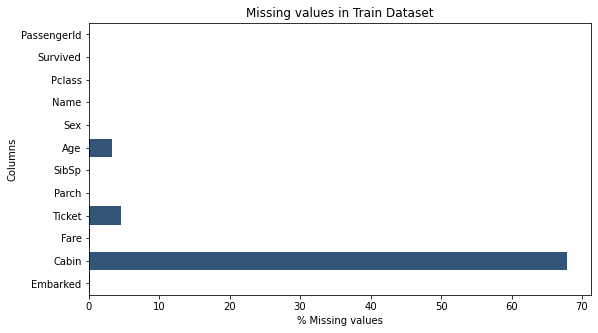

In [9]:
plt.figure(figsize = (9,5))
sns.barplot(x = null.values, y = list(null.index), color='#265484')
plt.xlabel("% Missing values")
plt.ylabel("Columns")
plt.title("Missing values in Train Dataset")
plt.show()

In [10]:
train.Cabin.head()

0    C12239
1       NaN
2       NaN
3       NaN
4       NaN
Name: Cabin, dtype: object

Cabin column contains almost 68% of null values. We will fill in them with "None" as data type is "Object".
Similarly we will treat Ticket and Embarked columns.

In [11]:
train["Embarked"].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [12]:
train["Cabin"] = train["Cabin"].fillna("None")
train["Ticket"] = train["Ticket"].fillna("None")
train["Embarked"] = train["Embarked"].fillna("S") 
#S - Southampton Port had most passangers and the number of missing values is insignificant

In [13]:
train.isnull().sum().sort_values(ascending=False)

Age            3292
Fare            134
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin             0
Embarked          0
dtype: int64

Let's look at Age distribution before deciding how to treat null values as Age is one of the most important attributes of survival.

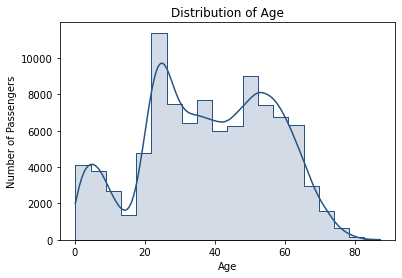

In [14]:
sns.histplot(data = train['Age'],bins=20,kde=True, color='#265484',element="step", alpha=0.2)
plt.title('Distribution of Age')
plt.ylabel('Number of Passengers')
plt.show()

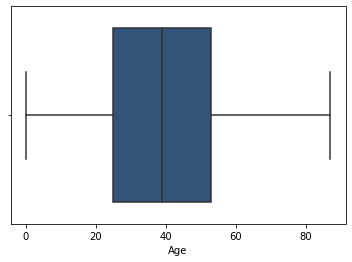

In [15]:
sns.boxplot(x = train['Age'],color='#265484')
plt.show()

Age distribution is left skewed to some extend so we will use median to fill in the missing values.

In [16]:
median_age = train["Age"].median()
train["Age"] = train["Age"].fillna(median_age)
train.isnull().sum().sort_values(ascending=False)

Fare           134
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Cabin            0
Embarked         0
dtype: int64

In [17]:
#Fill in missing fare values with mean by class (because fare is dependent on class)
train_mean_fare = lambda x: x.fillna(x.mean())
train["Fare"] = train.groupby(["Pclass"])["Fare"].apply(lambda x: x.fillna(x.mean()))
pcl_fare = train.groupby(["Pclass"])["Fare"].mean()
pcl1_mean_fare = pcl_fare.iloc[0]
pcl2_mean_fare = pcl_fare.iloc[1]
pcl3_mean_fare = pcl_fare.iloc[2]
train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
#Check duplicates in passenger names and ID
duplicates_name = train.duplicated(subset="Name", keep=False)
print(duplicates_name.value_counts())
duplicates_id = train.duplicated(subset="PassengerId", keep=False)
print(duplicates_id.value_counts())
#There are people with identical names but their IDs are unique => no duplicates

False    87240
True     12760
dtype: int64
False    100000
dtype: int64


In [19]:
#Check consistency in categorical columns
print(train["Survived"].unique())
print(train["Sex"].unique())
print(train["Pclass"].unique())
print(train["Embarked"].unique())

[1 0]
['male' 'female']
[1 3 2]
['S' 'C' 'Q']


There are no duplicates and categorial data is consistent.

## Exploratory Analysis and Visualisation

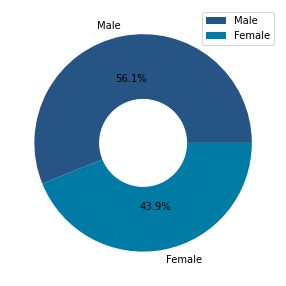

In [20]:
#Passengers by sex
plt.figure(figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871"]
sns.set_palette(sns.color_palette(colors))
data = train["Sex"].value_counts()
plt.pie(data,labels = ["Male","Female"],autopct='%.1f%%',)
circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

Almost 60% of the Titanic passenegers were men.

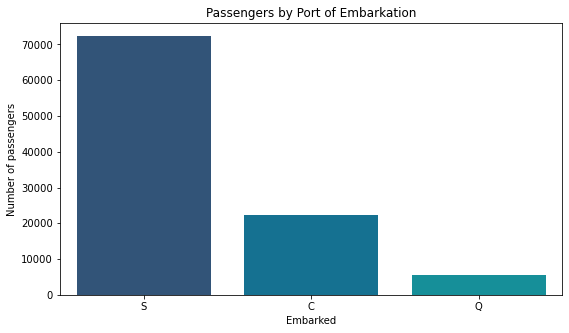

In [21]:
#Passengers by Port of Embarkation
plt.figure(figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(x="Embarked",data=train)
plt.ylabel("Number of passengers")
plt.title("Passengers by Port of Embarkation")
plt.show()

Southampton Port had the highest number of passengers.

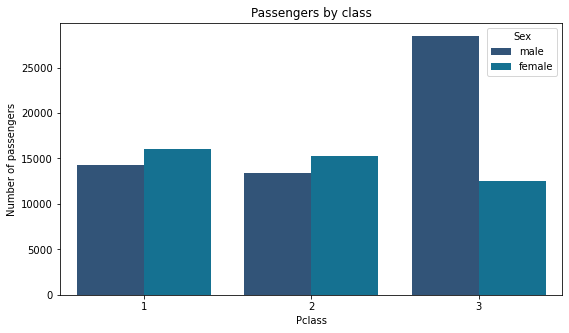

In [22]:
#Passengers by Class
plt.figure(figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(x="Pclass",hue = "Sex", data=train)
plt.ylabel("Number of passengers")
plt.title("Passengers by class")
plt.show()

More than 50% of first class passenegrs were women, and more than 60% of 3rd class passengers were men.

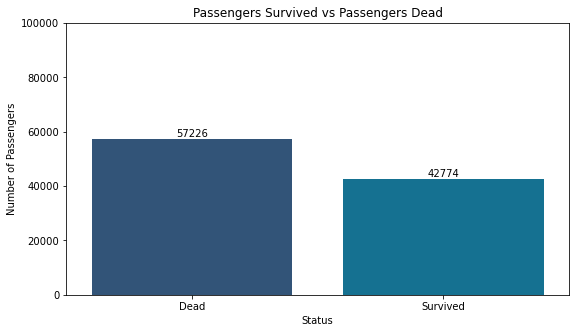

In [23]:
# No of Survived and Dead
plt.figure(figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871"]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Survived", data=train)
plt.xlabel("Status")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived vs Passengers Dead")
plt.ylim(0,100000)
plt.xticks([0,1], ['Dead', 'Survived'])
ax.bar_label(ax.containers[0])
plt.show()

More than 50% of passengers died.

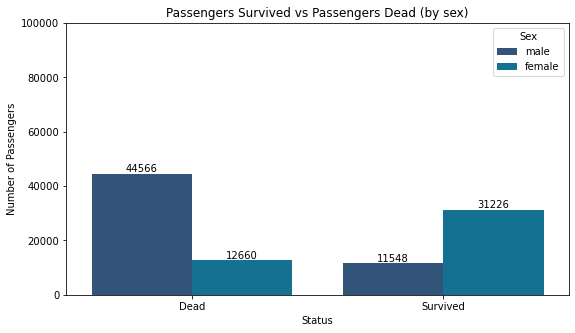

In [24]:
#Survival by sex
plt.figure(figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871"]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Survived", hue="Sex", data=train)
plt.xlabel("Status")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived vs Passengers Dead (by sex)")
plt.ylim(0,100000)
plt.xticks([0,1], ['Dead', 'Survived'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

Although initially there were more male passengers aboard the titanic, more women survived.

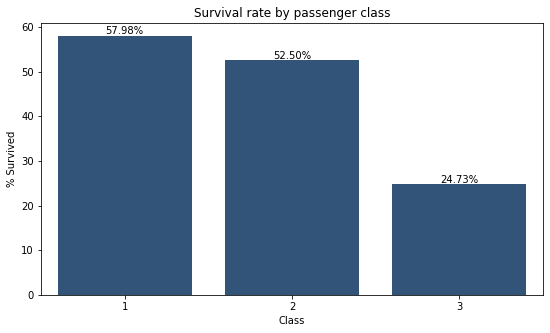

In [25]:
#Survival rate by class
df_1 = train.groupby("Pclass")["Survived"].apply(lambda x: x.sum()/len(x)*100)
plt.figure(figsize = (9,5))
ax = sns.barplot(x = list(df_1.index), y = df_1.values,color = "#265484")
plt.xlabel("Class")
plt.ylabel("% Survived")
plt.title("Survival rate by passenger class")
ax.bar_label(ax.containers[0],fmt='%.2f%%')
plt.show()

3rd class passengers had the least survival rate - 24.73%, whereas almost 60% and 50% of 1st and 2and class passengers survived.

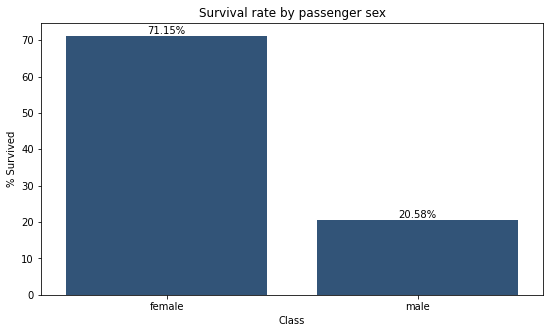

In [26]:
#Survival rate by sex
df_2 = train.groupby("Sex")["Survived"].apply(lambda x: x.sum()/len(x)*100)
plt.figure(figsize = (9,5))
ax = sns.barplot(x = list(df_2.index), y = df_2.values,color = "#265484")
plt.xlabel("Class")
plt.ylabel("% Survived")
plt.title("Survival rate by passenger sex")
ax.bar_label(ax.containers[0],fmt='%.2f%%')
plt.show()

The survival rate for females is more than 3x times higher than for males.

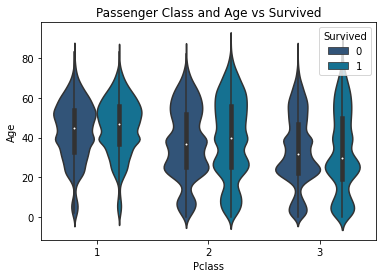

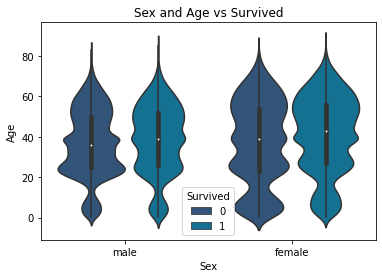

In [27]:
sns.violinplot(x = "Pclass",y="Age",hue="Survived",data=train)
plt.title("Passenger Class and Age vs Survived")
plt.show()
sns.violinplot(x="Sex",y="Age", hue="Survived", data=train)
plt.title("Sex and Age vs Survived")
plt.show()

Number children and young people is increasing from 1st to 3rd classs, with the highest number in 3rd class.
Survival rate of children under 10 years old is good irrespective of class.
Survival rate is quite better for women of all ages.

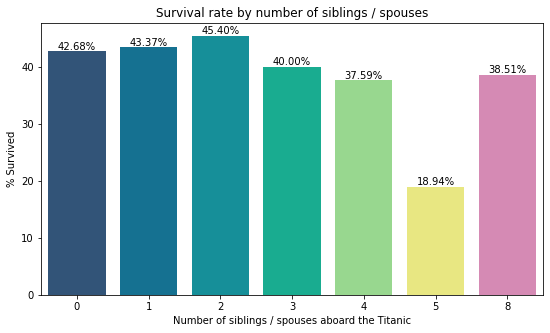

In [28]:
#Survival rate by number of sposes / siblings
df_3 = train.groupby("SibSp")["Survived"].apply(lambda x: x.sum()/len(x)*100)
plt.figure(figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871","#e17eb5"]
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x = list(df_3.index), y = df_3.values, palette = colors)
plt.xlabel("Number of siblings / spouses aboard the Titanic")
plt.ylabel("% Survived")
plt.title("Survival rate by number of siblings / spouses")
ax.bar_label(ax.containers[0],fmt='%.2f%%')
plt.show()

~43% of passenegers with under 2 siblings / sposes survived. The highest survival rate had passengers with 2 siblings / sposes aboard the Titanic.

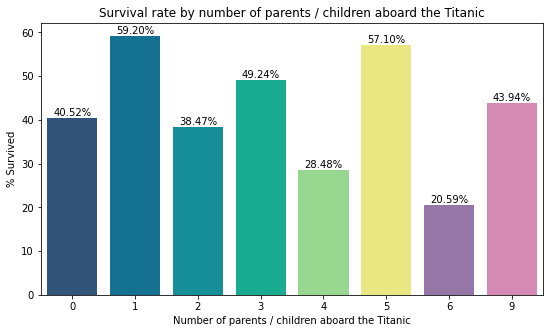

In [29]:
# Survival rate by parents / children 
df_4 = train.groupby("Parch")["Survived"].apply(lambda x: x.sum()/len(x)*100)
plt.figure(figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871","#996eaf","#e17eb5"]
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x = list(df_4.index), y = df_4.values, palette = colors)
plt.xlabel("Number of parents / children aboard the Titanic")
plt.ylabel("% Survived")
plt.title("Survival rate by number of parents / children aboard the Titanic")
ax.bar_label(ax.containers[0],fmt='%.2f%%')
plt.show()

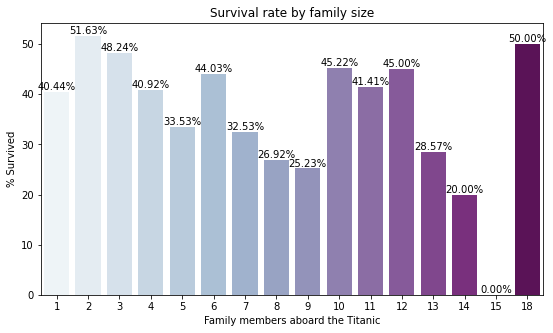

In [30]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
df_5 = train.groupby("Family")["Survived"].apply(lambda x: x.sum()/len(x)*100)
plt.figure(figsize=(9,5))
ax = sns.barplot(x = list(df_5.index), y = df_5.values, palette = "BuPu")
plt.xlabel("Family members aboard the Titanic")
plt.ylabel("% Survived")
plt.title("Survival rate by family size")
ax.bar_label(ax.containers[0],fmt='%.2f%%')
plt.show()

Survival rate for small families of 2 was the highest - 51.63%.

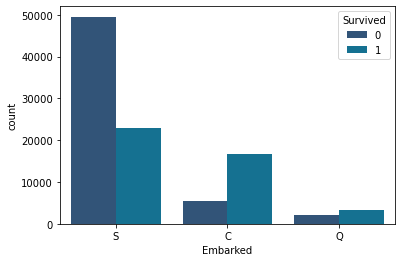

In [47]:
sns.countplot(x=train["Embarked"],hue = train["Survived"],data = train)
plt.show()

Passengers who started their journey from Southampton Port mostly died.

In [32]:
embarked_pcl_pivot = train.pivot_table(values=["Survived"], index=["Embarked", "Pclass"])
embarked_pcl_pivot

Survived
Embarked Pclass          
C        1       0.773959
         2       0.815627
         3       0.592646
Q        1       0.627299
         2       0.654028
         3       0.401689
S        1       0.411453
         2       0.437474
         3       0.203562

3rd class passengers from Souththampon Port were the least fortunate to survive. Survival rate for 1st and 2and class from this port are 41% and 44% respectively. 
The highest survival rates are among passengers from Cherbourg for all 3 classes.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


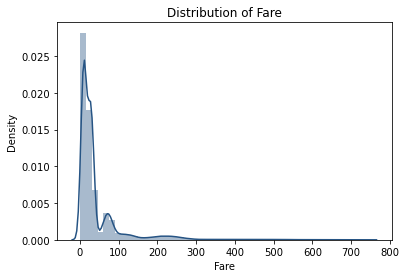

In [56]:
sns.distplot(x=train["Fare"])
plt.title("Distribution of Fare")
plt.ylabel("Density")
plt.xlabel("Fare")
plt.show()

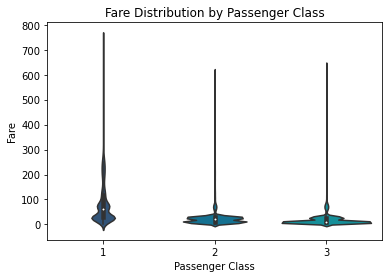

In [34]:
sns.violinplot(x="Pclass", y = "Fare", data = train)
plt.xlabel("Passenger Class")
plt.title("Fare Distribution by Passenger Class")
plt.show()

Fare is left skewed and also has lot of outliers at the upper extreme.

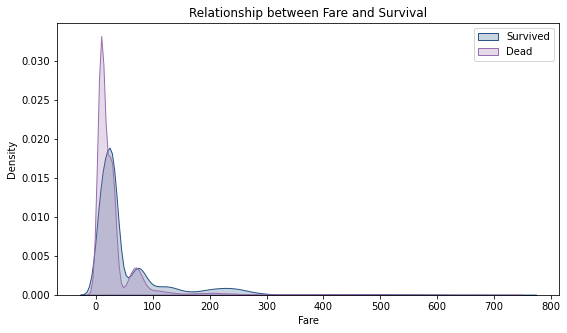

In [57]:
#Check relationship between Fare and Survival
plt.figure(figsize=(9,5))
ax = sns.kdeplot(train[train['Survived'] == 1]['Fare'], shade=True, legend=True, color='#265484')
ax = sns.kdeplot(train[train['Survived'] == 0]['Fare'], shade=True, legend=True, color='#996eaf')
plt.title('Relationship between Fare and Survival')
ax.legend(['Survived','Dead'])
plt.show()

Passengers who paid less fare had low probability of survival.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


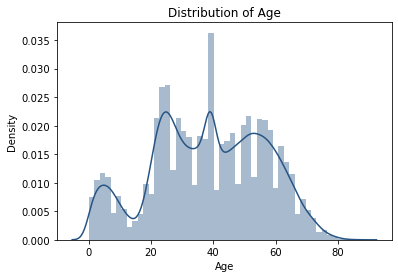

In [36]:
sns.distplot(train["Age"])
plt.title("Distribution of Age")
plt.show()

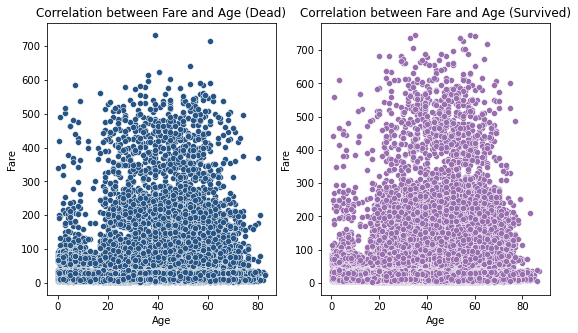

In [37]:
f, ax = plt.subplots(1, 2, figsize=(9,5))
colors = ["#265484","#007ba6","#00a2af","#00c59f","#8fe383","#f9f871","#996eaf","#e17eb5"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(x="Age", y="Fare", data=train.loc[train["Survived"] == 0, :], ax=ax[0], color="#265484")
sns.scatterplot(x="Age", y="Fare", data=train.loc[train["Survived"] == 1, :], ax=ax[1], color="#996eaf")
ax[0].set_title("Correlation between Fare and Age (Dead)")
ax[1].set_title("Correlation between Fare and Age (Survived)")
ax[0].set_ylabel("Fare")
ax[0].set_xlabel("Age")
ax[1].set_ylabel("Fare")
ax[1].set_xlabel("Age")
plt.show()

Older people were more likely to survive than young adults.

In [38]:
#Prepare data for Pearson correlation of features analysis
train_c = train.copy()
# Sex
train_c["Sex"] = train_c["Sex"].map({"male" : 0, "female" : 1}).astype(int)
  
# Embarked
train_c["Embarked"] = train_c["Embarked"].map({"C" : 0, "Q" : 1, "S" : 2}).astype(int)
    
# Age
train_c.loc[train_c["Age"] <= 21.81, "Age"] = 0
train_c.loc[(train_c["Age"] > 21.81) & (train_c["Age"] <= 43.54), "Age"] = 1
train_c.loc[(train_c["Age"] > 43.54) & (train_c["Age"] <= 65.27), "Age"] = 2
train_c.loc[train_c["Age"] > 65.27, "Age"] = 3
train_c["Age"] = train_c["Age"].astype(int)

train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,1,1,"Oconnor, Frankie",0,1,2,0,209245,27.14,C12239,2,3
1,1,0,3,"Bryan, Drew",0,1,0,0,27323,13.35,None,2,1
2,2,0,3,"Owens, Kenneth",0,0,1,2,CA 457703,71.29,None,2,4
3,3,0,3,"Kramer, James",0,0,0,0,A. 10866,13.04,None,2,1
4,4,1,3,"Bond, Michael",0,1,0,0,427635,7.76,None,2,1


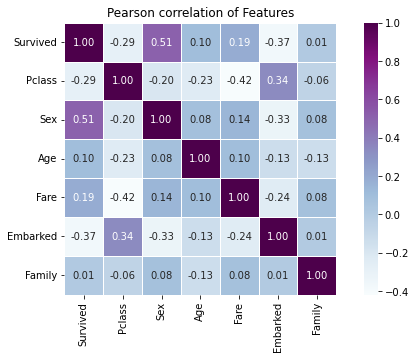

In [39]:
train_corr = train_c[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "Family"]]
fig = plt.figure(figsize=(10,5))
sns.heatmap(train_corr.corr(), linewidth=1, vmax=1.0, square=True, annot=True, fmt=".2f", cmap="BuPu")
plt.title("Pearson correlation of Features")
plt.show()

Pearson correlation analysis shows that Sex and Survival are moderately correlated - 0.51. Other features have a low correlation.

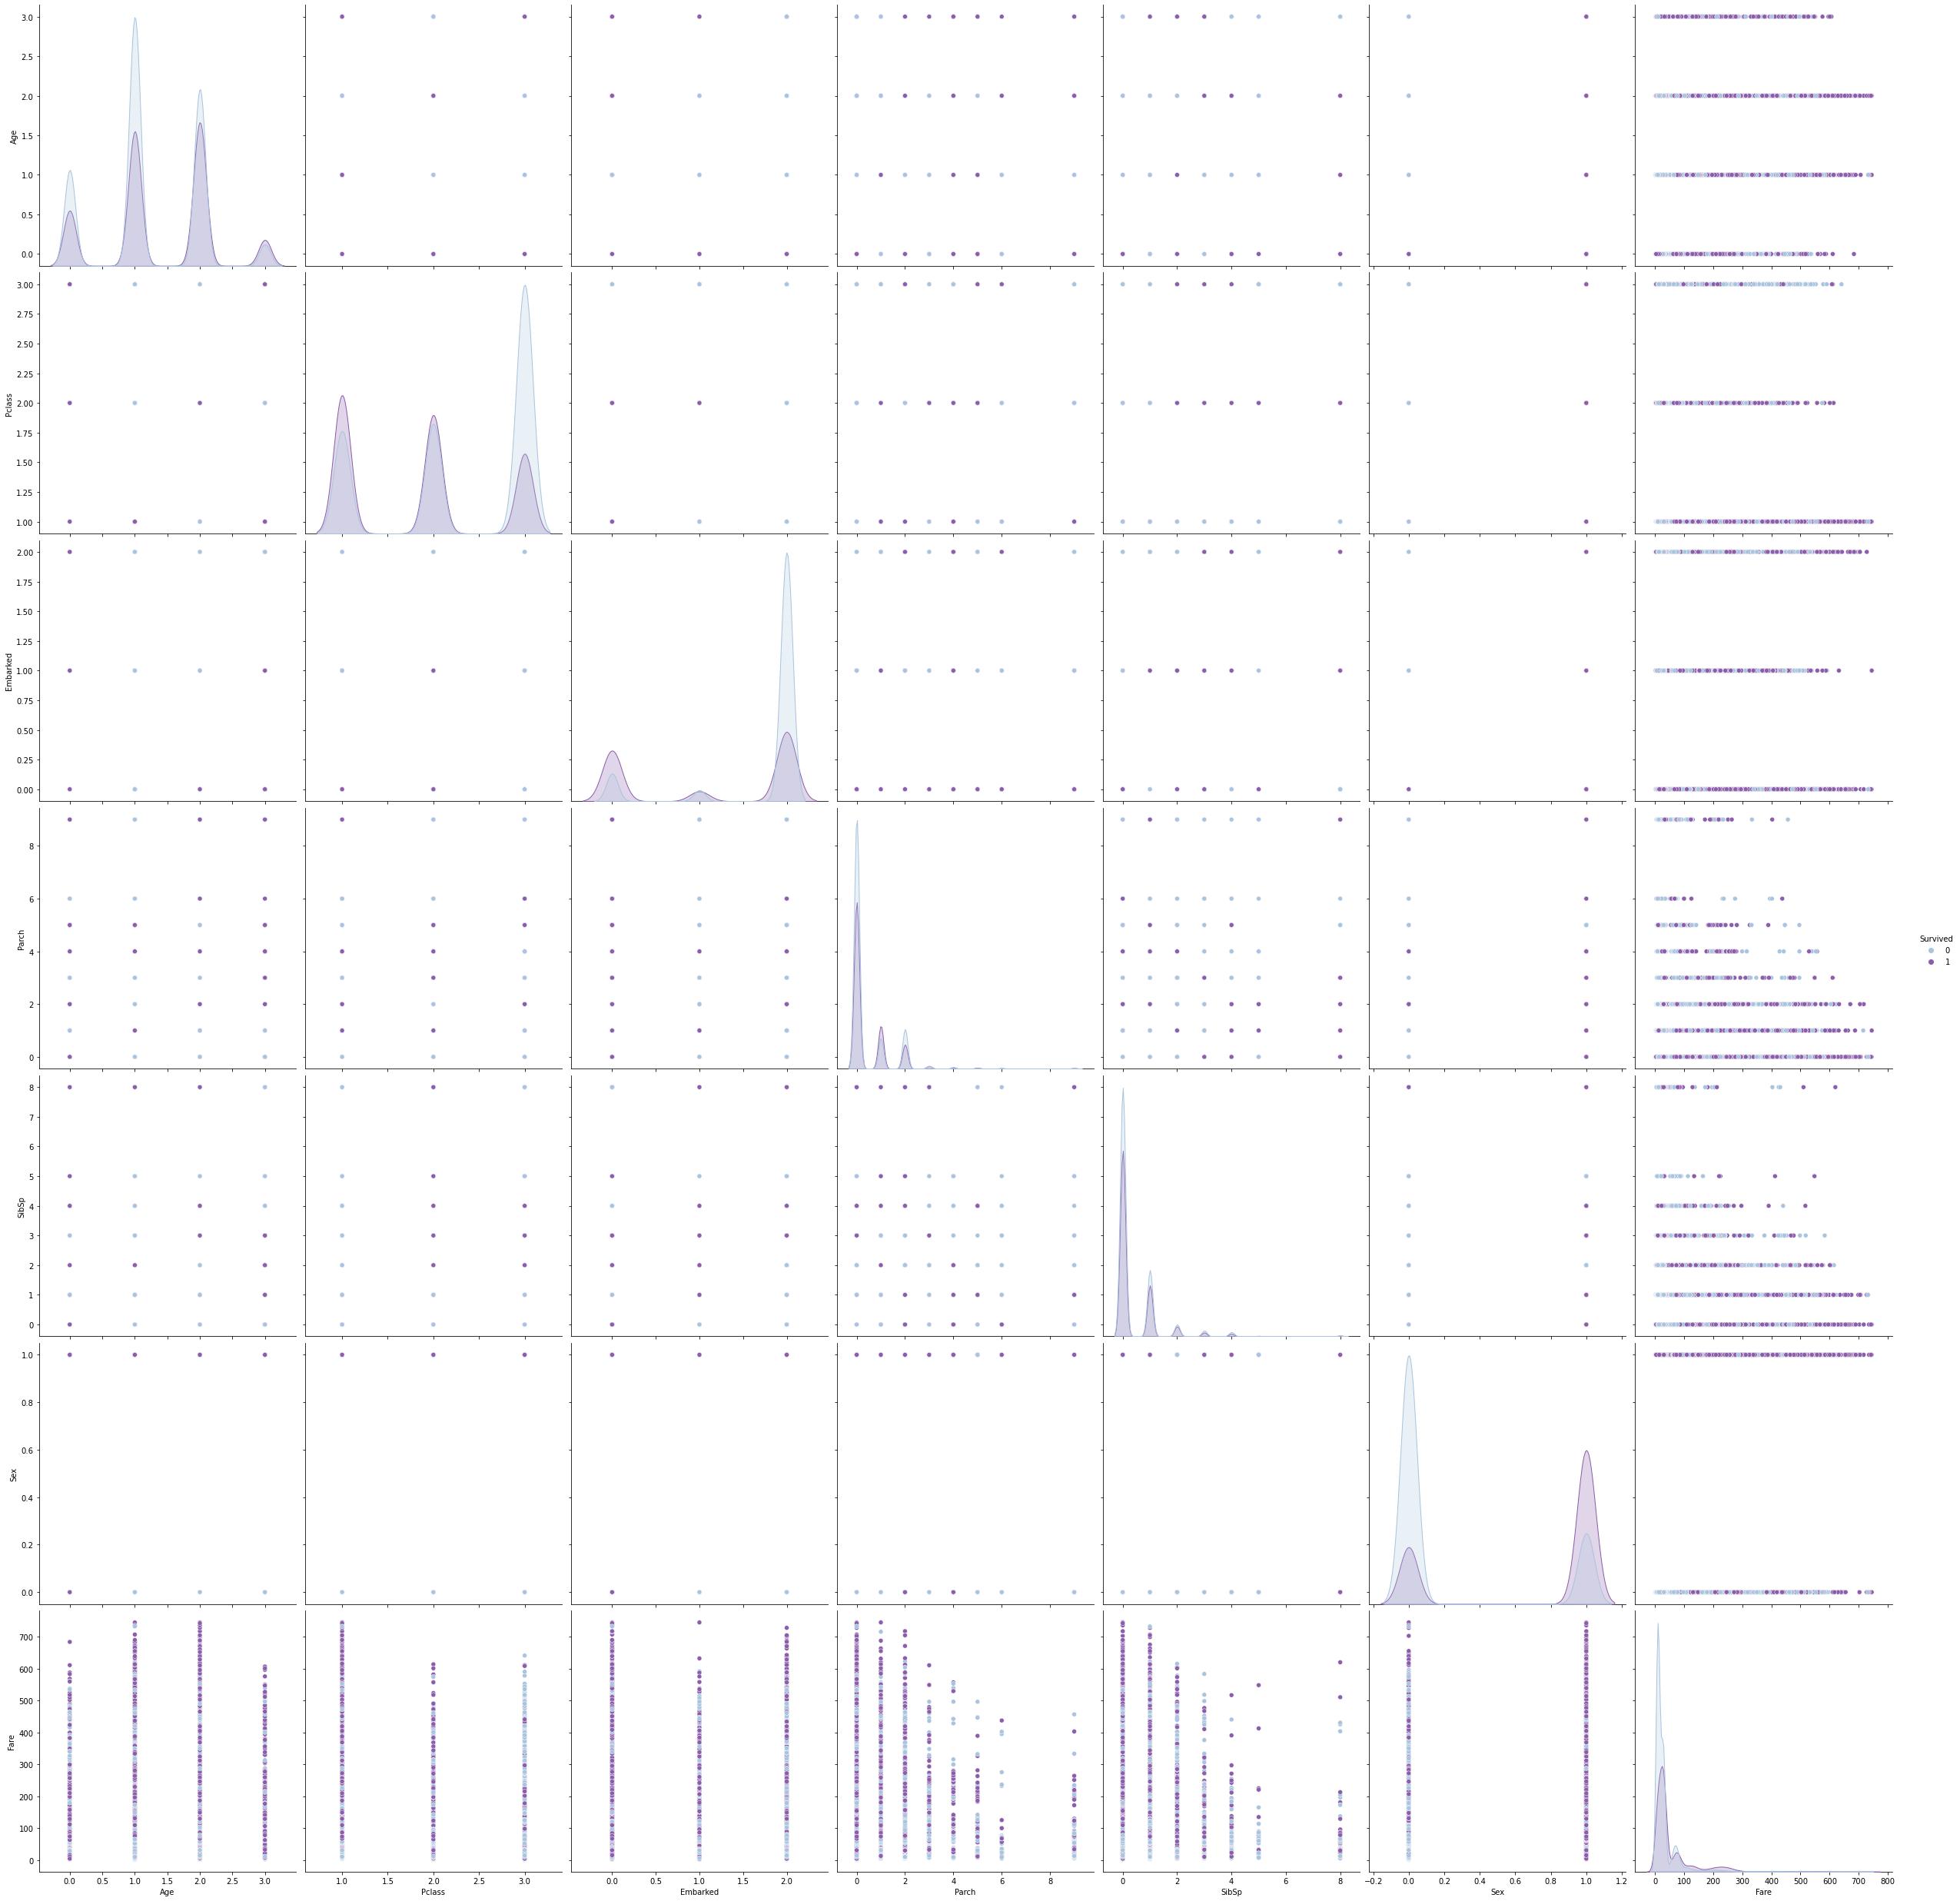

In [45]:
#Visualise other pairwise relations between features and Summarise
features = train_c[["Survived", "Age", "Pclass", "Embarked", "Parch", "SibSp", "Sex","Fare"]]
sns.pairplot(features, hue = "Survived", height = 5, palette = 'BuPu')
plt.show()

Passengers who paid more, had higher chances to survive
Passengers in 1s class were older.
Passengers embarked in Cherbourg and Queenstown paid more and had higher chances to survive.

## Summary

Almost 60% of the Titanic passenegers were men, however more women survived. 

Southampton Port had the highest number of passengers and lowest survival rates.

More than 50% of first class passenegrs were women, and more than 60% of 3rd class passengers were men.

Passengers embarked in Cherbourg and Queenstown paid more and had higher chances to survive.

Number children and young people is the highest in 3rd class. Survival rate of children under 10 years old is good irrespective of class. Survival rate for is quite better for women of all ages.

The highest survival rate had passengers with 2 siblings / sposes aboard the Titanic.

Older people were more likely to survive than young adults.

Pearson correlation analysis shows that Sex and Survival are moderately correlated - 0.51. Other features have a low correlation.